# Interactive gaussian anamorphosis modeling with hermite polynomials




In [1]:
#general imports
import pygslib    
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

#make the plots inline
#matplotlib notebook 
%matplotlib inline 

In [2]:
#get the data in gslib format into a pandas Dataframe
clusterdata= pygslib.gslib.read_gslib_file('../data/cluster.dat') 
clusterdata.head()

,Xlocation,Ylocation,Primary,Secondary,Declustering Weight
0,39.5,18.5,0.06,0.22,1.619
1,5.5,1.5,0.06,0.27,1.619
2,38.5,5.5,0.08,0.40,1.416
3,20.5,1.5,0.09,0.39,1.821
4,27.5,14.5,0.09,0.24,1.349


## Interactive anamorphosis modeling

('Raw Variance', 22.08676848118367)
('Variance from PCI', 20.358703131693936)
('zamin', 0.24949144211393612)
('zamax', 50.28887477652394)
('yamin', -0.9194733910523407)
('yamax', 2.9453773810449038)
('zpmin', 0.06004880303574711)
('zpmax', 58.209448542250705)
('ypmin', -2.1114367132879397)
('ypmax', 2.9453773810449038)


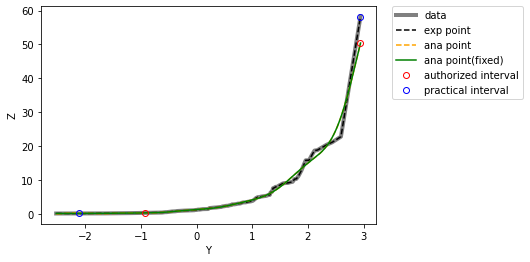

In [3]:
# Fit anamorphosis by changing, zmax, zmin, and extrapolation function
PCI, H, raw, zana, gauss, z, P, \
raw_var, PCI_var, fig1, \
zamin, zamax, yamin, yamax, \
zpmin, zpmax, ypmin, ypmax = pygslib.nonlinear.anamor(
                         z = clusterdata['Primary'], 
                         w = clusterdata['Declustering Weight'], 
                         zmin = None, 
                         zmax = None,
                         zpmin = None, 
                         zpmax = None,
                         ymin= None, 
                         ymax=None,
                         ndisc = 5000,
                         ltail=1, utail=4, ltpar=1, utpar=1.5, K=40)

In [4]:
PCI

array([ 2.52812133, -3.16715117,  2.62856091, -1.58607408,  0.61402391,
        0.06515102, -0.36432446,  0.30916284, -0.0787643 , -0.11881991,
        0.17886538, -0.09547426, -0.06390344,  0.15863711, -0.07932489,
       -0.09483481,  0.15103383, -0.01445782, -0.13576615,  0.10179446,
        0.06412297, -0.1353339 ,  0.02159456,  0.1148837 , -0.08782592,
       -0.0589713 ,  0.1174303 , -0.00804383, -0.10896485,  0.06506076,
        0.07185594, -0.0988453 , -0.02059144,  0.10495847, -0.03023138,
       -0.08630194,  0.06921178,  0.05052895, -0.08971688, -0.00727823,
        0.09002126])

## Block support transformation

('zamin blk', 0.06620899816151445)
('zamax blk', 50.288874776523954)
('yamin blk', -2.5229869512682748)
('yamax blk', 2.9453773810449038)
('zpmin blk', 0.06617075647035024)
('zpmax blk', 50.40764232296309)
('ypmin blk', -2.5251760482788086)
('ypmax blk', 2.946471929550171)


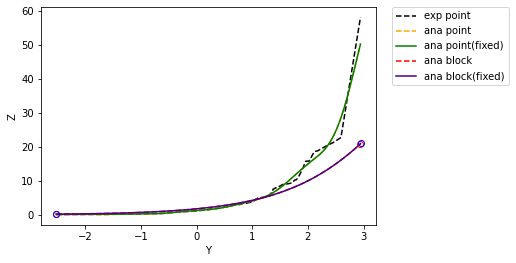

In [5]:
ZV, PV, fig2 = pygslib.nonlinear.anamor_blk( PCI, H, r = 0.7, gauss = gauss, Z = z,
                  ltail=1, utail=1, ltpar=1, utpar=1,
                  raw=raw, zana=zana)

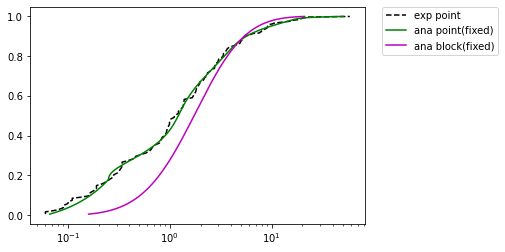

In [6]:
# the pair ZV, PV define the CDF in block support
# let's plot the CDFs
plt.semilogx (raw,P, '--k', label = 'exp point' ) 
plt.semilogx (z,P, '-g', label = 'ana point(fixed)' )  #point support (from gaussian anamorphosis)
plt.semilogx (ZV, PV, '-m',  label = 'ana block(fixed)')  #block support 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Grade Tonnage curves

In [7]:
help(pygslib.nonlinear.gtcurve)

Help on built-in function gtcurve in module pygslib.nonlinear:

gtcurve(...)
    gtcurve (cutoff, z, p, varred = 1, ivtyp = 0, zmin = None, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
    
    Calculates grade and normalized tonnage (0 to 1) above a given cutoff 
    from input pairs of variable z, and probability p. The function calls the `pygslib.gslib.postik`
    to calculate probability and grade. 
    
    You can pass z and p corrected to block support with DGM, with postik parameter `varred == 1`,
    to get a DGM global change of support. Alternatively, you can pass z and p in point support
    and use a variance reduction factor  `varred < 1` and `ivol = 1` to do affine correction (`ivtyp=1`)
    or indirect lognormal correction (`ivtyp=2`). 
    
    Parameters
    ----------
    cutoff: 1D numeric array
        1D array with cutoff grades to plot
    z, p: 1D numeric array 
        variable (grade) and its probabi

In [8]:
cutoff = np.arange(0,10, 0.1)
tt = []
gg = []
label = []

# calculate GTC from gaussian in block support 
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=ZV, p=PV, varred = 1, ivtyp = 0, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('DGM with block support')

# calculate GTC using undirect lognormal 
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=z, p=P, varred = 0.4, ivtyp = 2, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('Indirect Lognormal Correction')

# calculate GTC using affine 
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=z, p=P, varred = 0.4, ivtyp = 1, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('Affine Correction')

# calculate GTC in point support  
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=z, p=P, varred = 1, ivtyp = 2, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('Point (anamorphosis without support effect)')

In [9]:
help(pygslib.nonlinear.plotgt)

Help on built-in function plotgt in module pygslib.nonlinear:

plotgt(...)
    plotgt(cutoff, t, g, label)
    
    Plots grade and tonnage above cutoff previously calculated
    
    Parameters
    ----------
    cutoff: 1D numeric array
        1D array with cutoff grades to plot
    t, g: 2D numeric array 
        this is an array of n,m array, where n is the number of tonnage curves
        and m = len(cutoff). 
    label: 1D array of strings
        the names of each grade and tonnage curve
    figsize: 1D array, default [6.4, 4.8]
        size of the matplotlib figue



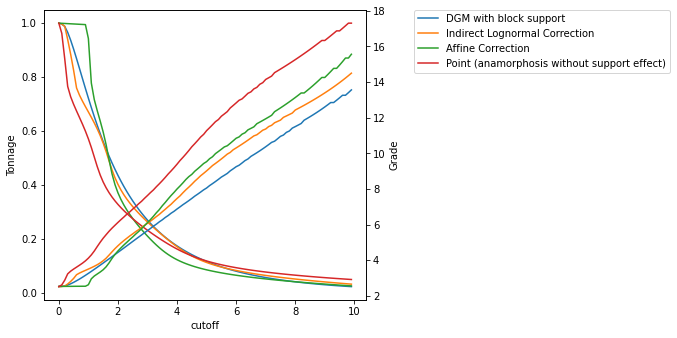

In [10]:
fig = pygslib.nonlinear.plotgt(cutoff = cutoff, t = tt, g = gg, label = label, figsize = [10, 4.8])

## Anamorphosis modeling from raw Z,Y pairs

('Raw Variance', 22.08676848118367)
('Variance from PCI', 16.6741848707983)


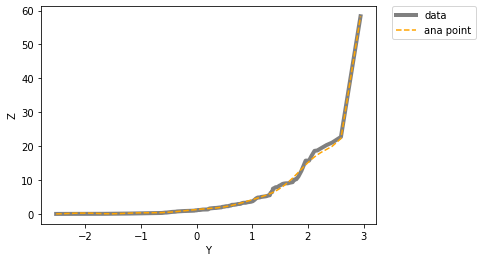

In [11]:
PCI, H, raw, zana, gauss, raw_var, PCI_var, fig3 = pygslib.nonlinear.anamor_raw(
                         z = clusterdata['Primary'], 
                         w = clusterdata['Declustering Weight'], 
                         K=40)